# 池化层——最大池化
* 目的：保留输入的特征，同时把数据量减小
* 作用：减少计算参数，增快计算速度。但是一些特征会被舍去。
https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#torch.nn.MaxPool2d
![image.png](1.png)
* 步长默认和卷积核大小相同
* 空洞卷积(dilation)

![image.png](2.png)

* ceil_mode

![image.png](3.png)

In [12]:
import torch
input = torch.tensor([[1,2,0,3,1],[0,1,2,3,1],[1,2,1,0,0],[5,2,3,1,1],[2,1,0,1,1]],dtype=torch.float32)

* 注意要类型转换防止报错

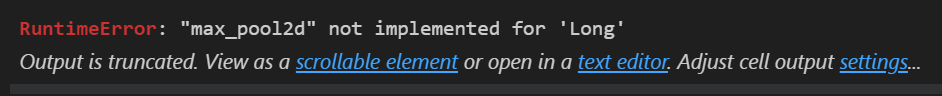

In [13]:
# 输入要是4维的，第一个是batch_size，让其自己计算
input = torch.reshape(input,(-1,1,5,5))
input.shape

torch.Size([1, 1, 5, 5])

In [14]:
from torch import nn
from torch.nn import MaxPool2d
class MyModule(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.maxPool1 = MaxPool2d(kernel_size=3,ceil_mode=True)

    def forward(self,input):
        output = self.maxPool1(input)
        return output

In [15]:
myModule = MyModule()
output = myModule(input)
output

tensor([[[[2., 3.],
          [5., 1.]]]])

* 与输出预期一致(ceil_mode = True)

![image.png](5.png)

# 图片实例

In [17]:
import torchvision
dataset = torchvision.datasets.CIFAR10(root="../8 Conv2d/data",train=False,download=False,
                                       transform= torchvision.transforms.ToTensor())


In [18]:
from torch.utils.data import DataLoader
dataloader = DataLoader(dataset=dataset,batch_size=64)

In [20]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter("./logs")
step = 1
for data in dataloader:
    imgs, targets = data
    writer.add_images("input",imgs,step)
    output = myModule(imgs)
    writer.add_images("output",output,step)
    step = step + 1
writer.close()

![6.png](6.png)